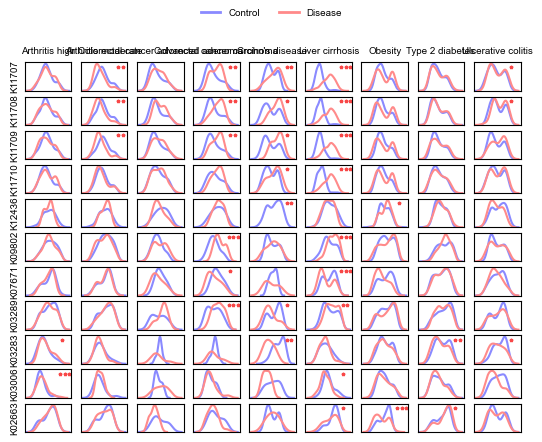

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'

gene_list=['K11707','K11708','K11709','K11710','K12436','K09802','K07671','K03289','K03283','K03006','K02663']
Disease_list=['Arthritis_High','Arthritis_Moderate','ColorectalCancer_AdvancedAdenoma','ColorectalCancer_Carcinoma','CrohnsDisease','LiverCirrhosis','Obesity','Type2Diabetes','UlcerativeColitis']
control_list=['Arthritis_None','Arthritis_None','ColorectalCancer_Controls','ColorectalCancer_Controls','CrohnsDisease_None','LiverCirrhosis_None','Obesity_None','Type2Diabetes_None','UlcerativeColitis_None']
Disease_list2=['Arthritis high','Arthritis moderate','Colorectal cancer advanced adenoma','Colorectal cancer carcinoma','Crohn\'s disease','Liver cirrhosis','Obesity','Type 2 diabetes','Ulcerative colitis']
dir1='gene abundance (disease)/'
dir2='relationship between disease and control peoples/'
#genes with significant difference in diseases and control.
significant_differences=pd.read_csv(dir2+'Diseases and control populations with significant differences',sep='\t')
significant_disease=significant_differences.iloc[:,0].tolist()
significant_genes=significant_differences.iloc[:,1].tolist()
significant_pvalue=significant_differences.iloc[:,2].tolist()
significant_pair1=[]
significant_pair2=[]
significant_pair3=[]
for i in range(len(significant_disease)):
    if significant_pvalue[i]<0.05 and significant_pvalue[i]>0.01:
        significant_pair1.append([significant_disease[i],significant_genes[i]])
    if significant_pvalue[i]<0.01 and significant_pvalue[i]>0.001:
        significant_pair2.append([significant_disease[i],significant_genes[i]])
    if significant_pvalue[i]<0.001:
        significant_pair3.append([significant_disease[i],significant_genes[i]])
fig=plt.figure()
for i in range(len(Disease_list)):
    df0=pd.read_csv(dir1+control_list[i]+'_Gene_abundance',index_col=0,sep='\t')
    df1=pd.read_csv(dir1+Disease_list[i]+'_Gene_abundance',index_col=0,sep='\t')
    for j in range(len(gene_list)):
        ax=fig.add_subplot(len(gene_list),len(Disease_list),j*len(Disease_list)+i+1)
        y0=df0[gene_list[j]]
        data0=np.log(y0[y0>0])
        sns.kdeplot(data0,color='#8A8AFF')
        y1=df1[gene_list[j]]
        data1=np.log(y1[y1>0])
        sns.kdeplot(data1,color='#FF8A8A')
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('')
        plt.ylabel('')
        if j==0:
            plt.title(Disease_list2[i],family='Arial',size=7,loc='center')
        else:
            plt.title('')
        if i==0:
             plt.ylabel(gene_list[j],family='Arial',size=7,loc='center')
        else:
            plt.ylabel('')

        pairs = [Disease_list2[i], gene_list[j]]
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        x_star = xlim[1] - 0.20 * (xlim[1] - xlim[0])  
        y_star = ylim[1] - 0.15 * (ylim[1] - ylim[0])
        if pairs in significant_pair1:
            plt.plot(x_star, y_star,marker='*',markersize=2.5,color="#F84747")
        if pairs in significant_pair2:
            plt.plot(x_star, y_star,marker='*',markersize=2.5,color="#F84747")
            plt.plot(x_star+ 0.10 * (xlim[1] - xlim[0]), y_star , marker='*', markersize=2.5, color="#F84747")
        if pairs in significant_pair3:
            plt.plot(x_star, y_star,marker='*',markersize=2.5,color="#F84747")
            plt.plot(x_star+ 0.10 * (xlim[1] - xlim[0]), y_star , marker='*', markersize=2.5, color="#F84747")
            plt.plot(x_star+ 0.20 * (xlim[1] - xlim[0]), y_star , marker='*', markersize=2.5, color="#F84747")
custom_lines = [
    Line2D([0], [0], color='#8A8AFF', lw=2),
    Line2D([0], [0], color='#FF8A8A', lw=2)
    ]
fig.legend(custom_lines,['Control','Disease'],loc='upper center',prop={'family': 'Arial','size':7},frameon=False,ncol=3)
fig.savefig('fig/bimodal genes distribution in disease and control pepole(all).pdf')